## Imports

In [1]:
# Imports
import numpy as np # for doing math stuff
import tensorflow as tf # for building the modle
from tensorflow import keras # for building the model
import pandas as pd # for reading csv
import csv # for writing csv
import pydicom as pdcm # for reading the image data
import matplotlib.pyplot as plt # for visualizing the data
import os # for file manipulation
from IPython.display import clear_output, display # for clearing output and displaying
import timeit # for timing processes

# Make sure matplotlib is inline
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


## Helper functions
Some functions to make life a bit easier.

In [2]:
# Function for displaying progress
def display_progress(total, current):
    clear_output(wait=True)
    display(str(np.around((current / total) * 100, decimals=3)) + "%")

In [3]:
# Plotting function for plotting images
def plot_images(images, titles, figsize):
    fig_shape = int(np.ceil(len(images) / 2))
    fig = plt.figure(figsize=figsize)
    for i in range(0, len(images)):
        img = images[i]
        ax = fig.add_subplot(fig_shape, fig_shape, i + 1)
        if len(titles) != 0:
            plt.title(titles[i])
        ax.imshow(img, cmap=plt.cm.binary)
        ax.axis('off')
plt.show()

## Reading the image data
Handy tutorial for pydicom:
https://mscipio.github.io/post/read_dicom_files_in_python/

In [4]:
# Get all the file names from the data/stage_1_train_images folder
train_dcm_file_names = os.listdir('data/stage_1_train_images')
# Read the files and put them in one array
read_dcm = lambda filename: pdcm.read_file('data/stage_1_train_images/' + filename)
train_dcm_files = list(map(read_dcm, train_dcm_file_names))
len(train_dcm_files)

25684

## Quick visual of some scans

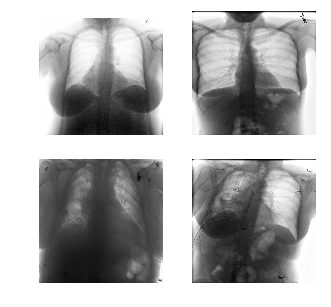

In [9]:
images = []
titles = []
for i in range(0, 4):
    # Get image data
    image = train_dcm_files[i].pixel_array
    title = train_dcm_files[i].PatientID
    images.append(image)
    titles.append(title)

plot_images(images, [], (5, 5))

## Prepare the data
Let's load the labels and prepare the data.

In [10]:
labels = pd.read_csv('data/stage_1_train_labels.csv', header=None)

# Function for finding item in array (returns index)
def find_item(array, item):
    for i in range(0, len(array)):
        if item == array[i][0]:
            return i

# Align the label array with the dcm files and show progress
# This takes a while
train_labels = []
get_label = lambda x: labels.values[find_item(labels.values, x.PatientID)]
train_labels = list(map(get_label, train_dcm_files))
len(train_labels)

25684

In [11]:
# Reshape the data into the correct form
# Reshape the labels
final_train_labels = []
target_map = {
    0: [1, 0],
    1: [0, 1]
}
for i in range(0, len(train_labels)):
    target = int(train_labels[i][5])
    final_train_labels.append(target_map[target])
    
for i in range(0, len(train_labels)):
    target = int(train_labels[i][5])
    

In [ ]:
# Reshape the images and normalize
train_images = [x.pixel_array / 255.0 for x in train_dcm_files]
# train_images = [x.pixel_array for x in train_dcm_files]

In [ ]:
# Convert everything to an np array
train_images = np.array(train_images)
# final_train_labels = np.array(final_train_labels)
train_labels = np.array(final_train_labels)
train_images.shape

In [ ]:
# Save the data using numpy
np.saves("data.npz", train_images=train_images, final_train_labels=final_train_labels)

In [ ]:
# Load the saved numpy data
data = np.load("data.npz")

## Build the model
Using keras

In [ ]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(200, activation=tf.nn.relu))
    model.add(keras.layers.Dense(200, activation=tf.nn.relu))
    model.add(keras.layers.Dense(2, activation=tf.nn.softmax))
    return model

model = create_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images, final_train_labels)